In [1]:
from assets.data_generator import DR_Generator
import os
from assets.models import SMD_Unet
from assets.trainer import Trainer
import tensorflow as tf

In [2]:
masks = ['HardExudate_Masks', 'Hemohedge_Masks', 'Microaneurysms_Masks', 'SoftExudate_Masks']
mask_dir = '../data/Seg-set'
mask_paths = [os.path.join(mask_dir, mask) for mask in masks]

generator_args = {
    'dir_path':'../data/Seg-set/Original_Images/',
    'mask_path':mask_paths,
    'use_mask':True,
    'img_size':(512, 512),  
    'batch_size':4, # 8로 하면 바로 OOM 뜸
    'dataset':'FGADR', # FGADR or EyePacks
    'is_train':True,
    'use_3channel':True,
    'CLAHE_args':None
}

tr_fgadr_gen = DR_Generator(start_end_index=(0, 1292), **generator_args)
val_fgadr_gen = DR_Generator(start_end_index=(1292, 1476), **generator_args)
ts_fgadr_gen = DR_Generator(start_end_index=(1476, 1842), **generator_args)

In [3]:
model = SMD_Unet(enc_filters=[64, 128, 256, 512, 1024], dec_filters=[512, 256, 64, 32], input_channel=3)

In [4]:
# model.load_weights()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 

trainer_args = {
    'model':model,
    'epochs':100,
    'optimizer':optimizer,
    'for_recons':False,
    'alpha':0.1,
    'beta':None,
    'first_epoch':1,
    'file_name':'history/with_recons_3channel_no_CLAHE.txt',
    'save_model_path':'../models/with_recons_3channel_no_CLAHE'
}
trainer = Trainer(**trainer_args)

history = trainer.train(train_dataset=tr_fgadr_gen,
                        val_dataset=val_fgadr_gen,
                       )


Epoch 1/100
184/184 [==============================] - 59s 322ms/step - val_loss: 0.8641 - mask_loss: 0.9544 - loss_recons: 0.0516

Epoch 2/100
184/184 [==============================] - 43s 235ms/step - val_loss: 0.8626 - mask_loss: 0.9543 - loss_recons: 0.0366

Epoch 3/100
184/184 [==============================] - 43s 236ms/step - val_loss: 0.8610 - mask_loss: 0.9539 - loss_recons: 0.0248

Epoch 4/100
184/184 [==============================] - 43s 236ms/step - val_loss: 0.8606 - mask_loss: 0.9544 - loss_recons: 0.0160

Epoch 5/100
184/184 [==============================] - 43s 236ms/step - val_loss: 0.8601 - mask_loss: 0.9546 - loss_recons: 0.0101

Epoch 6/100
184/184 [==============================] - 43s 236ms/step - val_loss: 0.8594 - mask_loss: 0.9542 - loss_recons: 0.0066

Epoch 7/100
184/184 [==============================] - 43s 235ms/step - val_loss: 0.8597 - mask_loss: 0.9547 - loss_recons: 0.0046

Epoch 8/100
184/184 [==============================] - 43s 235ms/step - val

184/184 [==============================] - 42s 231ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 8.4610e-04

Epoch 33/100
184/184 [==============================] - 42s 230ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 8.0378e-04

Epoch 34/100
184/184 [==============================] - 42s 229ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 7.7866e-04

Epoch 35/100
184/184 [==============================] - 42s 230ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 7.5942e-04

Epoch 36/100
184/184 [==============================] - 42s 231ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 7.4243e-04

Epoch 37/100
184/184 [==============================] - 42s 230ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 7.2746e-04

Epoch 38/100
184/184 [==============================] - 42s 230ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 7.1437e-04

Epoch 39/100
184/184 [==============================] 

184/184 [==============================] - 43s 233ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 6.1425e-04

Epoch 64/100
184/184 [==============================] - 42s 231ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 6.1263e-04

Epoch 65/100
184/184 [==============================] - 42s 230ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 6.1342e-04

Epoch 66/100
184/184 [==============================] - 43s 231ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 6.1046e-04

Epoch 67/100
184/184 [==============================] - 43s 232ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 6.0955e-04

Epoch 68/100
184/184 [==============================] - 43s 232ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 6.0888e-04

Epoch 69/100
184/184 [==============================] - 43s 232ms/step - val_loss: 0.8395 - mask_loss: 0.9327 - loss_recons: 6.0835e-04

Epoch 70/100
184/184 [==============================] 

# 결과 시각화하기

In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
generator_args = {
  'dir_path':'../data/train',
  'mask_path':None,
  'use_mask':False,
  'img_size':(512, 512),  
  'batch_size':4, # 8로 하면 바로 OOM 뜸
  'dataset':'EyePacks', # FGADR or EyePacks
  'is_train':True
}

tr_eyepacks_gen = DR_Generator(start_end_index=(0, 10000), **generator_args)
val_eyepacks_gen = DR_Generator(start_end_index=(10000, 11000), **generator_args)

In [10]:
for inputs, _, in val_eyepacks_gen:
    break
    
inputs.shape

(4, 512, 512, 1)

In [4]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 

trainer_args = {
    'model':model,
    'epochs':3,
    'optimizer':optimizer,
    'for_recons':True,
    'alpha':0.1,
    'beta':[0.25, 0.25, 0.25, 0.25]
}
trainer = Trainer(**trainer_args)

history = trainer.train(train_dataset=tr_eyepacks_gen,
                        val_dataset=val_eyepacks_gen,
                       )


Epoch 1/3
1000/1000 [==============================] - 178s 178ms/step - val_loss: 9.8469e-06

Epoch 2/3
1000/1000 [==============================] - 178s 178ms/step - val_loss: 4.5066e-06

Epoch 3/3
1000/1000 [==============================] - 194s 194ms/step - val_loss: 2.4240e-06


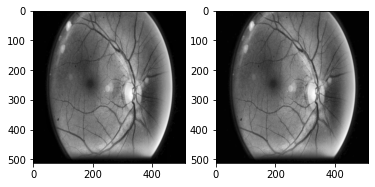

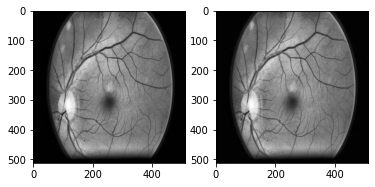

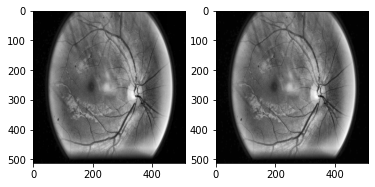

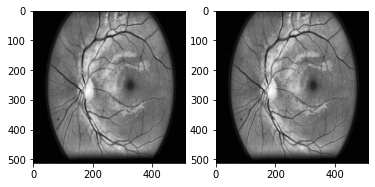

In [32]:
preds = model(inputs)[0].numpy()

for input, pred in zip(inputs, preds):
    plt.subplot(1, 2, 1)
    plt.imshow(np.int_(input * 255), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(np.int_(pred * 255), cmap='gray')
    plt.show()